In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
%matplotlib inline

In [3]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification

In [4]:
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=0.6)

In [5]:
X.shape

(300, 2)

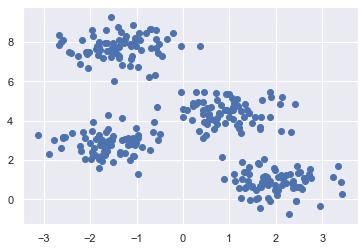

In [6]:
plt.scatter(X[:,0], X[:, 1])

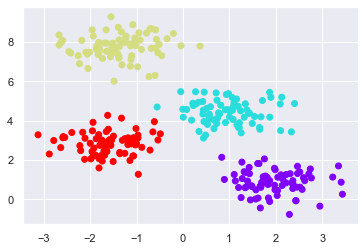

In [8]:
model = KMeans(4)
model.fit(X)
y_means = model.predict(X)
plt.scatter(X[:,0], X[:, 1], c=y_means, cmap = 'rainbow')

In [9]:
from sklearn.datasets import load_iris
import pandas as pd

In [10]:
iris = load_iris()

In [12]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
X = iris_df.iloc[:, 3]
X

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal width (cm), Length: 150, dtype: float64

In [16]:
y = iris_df.iloc[:, 2]
y

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal length (cm), Length: 150, dtype: float64

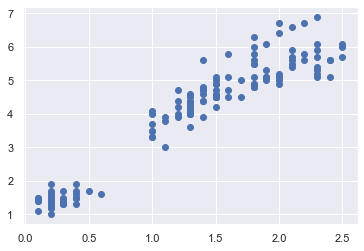

In [17]:
plt.scatter(X,y)

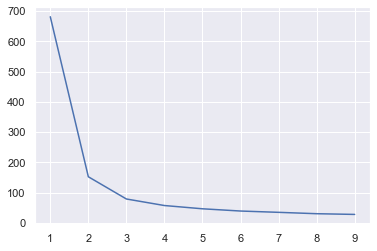

In [19]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(iris_df)
    sse[k] = kmeans.inertia_
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))

In [23]:
model = KMeans(n_clusters=3, max_iter=1000)

In [24]:
model.fit(iris_df)

KMeans(max_iter=1000, n_clusters=3)

In [26]:
model.predict([[7.6,3, 6.6, 2.1]])

array([2])

In [29]:
from sklearn.metrics import silhouette_score
score = silhouette_score(iris_df, model.labels_)
score

0.5528190123564091